<a href="https://colab.research.google.com/github/gabrieldevalves/RNA-e-Deep-Learning---CESAR-School-2025.01-Public/blob/main/Gabriel_Alves_Atividade_1_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

df = pd.read_csv(f"{path}/Salary_dataset.csv")
df.head()

Using Colab cache for faster access to the 'salary-dataset-simple-linear-regression' dataset.


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [9]:
#Exclusão de coluna 'Unnamed' que está zerada

df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df['Salary'].describe()

,Salary
count,30.000000
mean,76004.000000
std,27414.429785
min,37732.000000
25%,56721.750000
50%,65238.000000
75%,100545.750000
max,122392.000000


In [11]:
#Separação de variáveis dependentes e independentes

X = df[['YearsExperience']]
y = df['Salary']

In [12]:
#Divisão em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = modelo.predict(X_test)

In [18]:
#Avaliação do modelo

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

MAE: 6286.45
RMSE: 7059.04
R²: 0.902


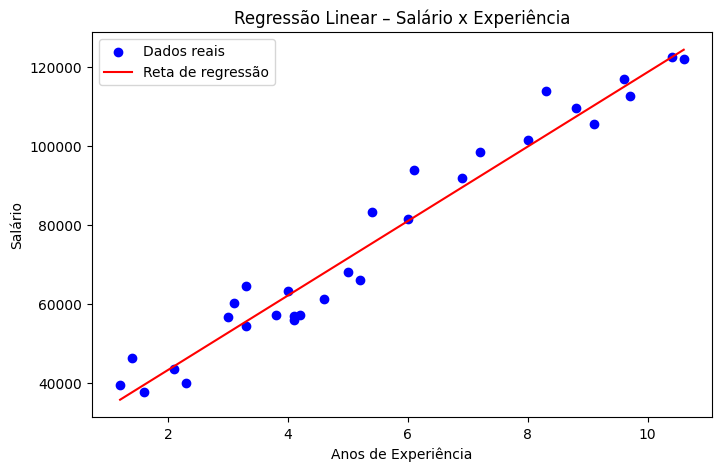

In [20]:
#Visualização do resultado do modelo

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, modelo.predict(X), color='red', label='Reta de regressão')
plt.title('Regressão Linear – Salário x Experiência')
plt.xlabel('Anos de Experiência')
plt.ylabel('Salário')
plt.legend()
plt.show()

In [24]:
#Previsão manual de salário

valor = float(input("Digite os anos de experiência: "))
anos_experiencia = np.array([[valor]])
salario_previsto = modelo.predict(anos_experiencia)
print(f"Salário previsto para {anos_experiencia[0][0]} anos de experiência = R${salario_previsto[0]:,.2f}")

Digite os anos de experiência: 5
Salário previsto para 5.0 anos de experiência = R$71,499.28


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
